In [114]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

comixology_df = pd.read_csv("comixology_comics_dataset_19.04.2016.csv", encoding = "ISO-8859-1")

In [115]:
# Vamos criar uma coluna de preço por página para futuras análises
comixology_df['Price_per_page'] = pd.Series(comixology_df['Original_price'] / comixology_df['Page Count'], 
                                            index=comixology_df.index)
                                            
# Como alguns comics estão com a contagem de páginas igual a zero, vamos definir para estes o Price_per_page
# igual a NaN
comixology_df.Price_per_page[comixology_df['Price_per_page'] == np.inf] = np.nan

In [116]:
# Vamos extrair o ano da string de data de publicação da versão impressa
print_dates = []
for index, row in comixology_df.iterrows():
    if type(comixology_df.ix[index]['Print Release Date']) == float:
        row_year = np.nan
    else:        
        row_year = int(comixology_df.ix[index]['Print Release Date'].split()[2])
        if row_year > 2016:
            row_year = np.nan
    print_dates.append(row_year)

comixology_df['Print_Release_Year'] = pd.Series(print_dates, index=comixology_df.index)

In [117]:
# Definir o número de colunas para impressão de tabelas
pd.set_option('display.max_colwidth', 40)

In [118]:
# Vamos listar as comics com rating 5 estrelas que possuam pelo menos 20 ratings e 
# ordena-las por preço por página
comics_with_5_stars = comixology_df[comixology_df.Rating == 5]
comics_with_5_stars = comics_with_5_stars[comics_with_5_stars.Ratings_Quantity > 20]
print(comics_with_5_stars[['Name','Publisher','Price_per_page']].sort_values(by='Price_per_page'))

                                          Name                     Publisher  \
44099               Left 4 Dead: The Sacrifice                         Valve   
6143                      Looking For Group #1                 Blind Ferret    
55253                      The Walking Dead #1              Image - Skybound   
30295  FCBD 2014: Don Rosa's Uncle Scrooge ...                 Fantagraphics   
8762                   Mother Russia #1 (of 3)  Alterna Comics - FUBAR Press   
80022  Scott Pilgrim Vol. 1: Scott Pilgrim'...                     Oni Press   
50270       Transformers: The Cover Collection                           IDW   
42749                        American Elf 2001         Top Shelf Productions   
42748                        American Elf 2000         Top Shelf Productions   
7677           Cerebus Vol. 2 #2: High Society             Aardvark-Vanaheim   
81547                     Heart of a Corpse #2                           SLG   
7679           Cerebus Vol. 2 #4: High S

In [119]:
# Para a próxima análise, usaremos somente comics com mais de 5 ratings
comics_more_than_5_ratings = comixology_df[comixology_df.Ratings_Quantity > 5]

In [120]:
# Criar pivot table com média das avaliações por Publisher
publishers_avg_rating = pd.pivot_table(comics_more_than_5_ratings, 
                                       values=['Rating'], 
                                       index=['Publisher'], 
                                       aggfunc=[np.mean, np.count_nonzero])

In [121]:
# Primeiramente vamos avaliar qualquer publisher que tenha mais de 20 comics com avaliações
main_pub_avg_rating = publishers_avg_rating[publishers_avg_rating.count_nonzero.Rating > 20]
main_pub_avg_rating = main_pub_avg_rating.sort_values(by=('mean','Rating'), ascending=False)
print(main_pub_avg_rating)

                                        mean count_nonzero
                                      Rating        Rating
Publisher                                                 
Cartoon Books                       4.875000          80.0
Aardvark-Vanaheim                   4.800000          25.0
Abstract Studio                     4.786517          89.0
BOOM! - BOOM! Box                   4.763889          72.0
Archie                              4.711656         326.0
Icon                                4.585859         198.0
Evil Twin Comics                    4.565217          23.0
Udon                                4.561798          89.0
MAX                                 4.546911         437.0
Fantagraphics                       4.518182         110.0
Image - Skybound                    4.504092         611.0
ComixTribe                          4.500000          32.0
Kodansha                            4.487179          39.0
Delcourt                            4.463415          41

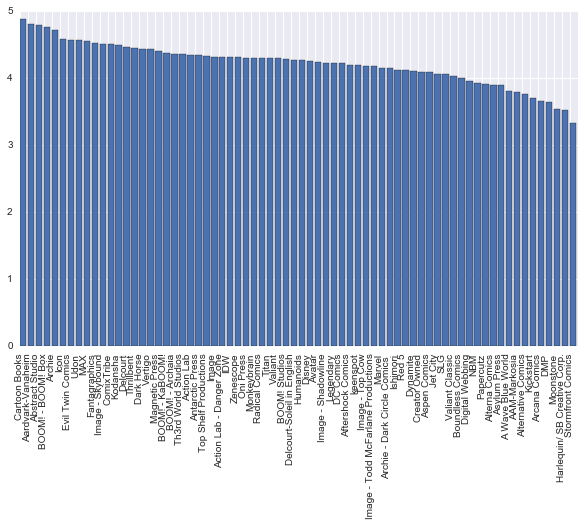

In [122]:
# Agora, um gráfico com a avaliação média de cada editora
y_axis = main_pub_avg_rating['mean']['Rating']
x_axis = range(len(y_axis))

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, tuple(main_pub_avg_rating.index),rotation=90)
plt.show()

In [123]:
# E agora vamos ver as bem grandes, com mais de 300 comics com avaliações
big_pub_avg_rating = publishers_avg_rating[publishers_avg_rating.count_nonzero.Rating > 300]
big_pub_avg_rating = big_pub_avg_rating.sort_values(by=('mean','Rating'), ascending=False)
print(big_pub_avg_rating)

                                        mean count_nonzero
                                      Rating        Rating
Publisher                                                 
Archie                              4.711656         326.0
MAX                                 4.546911         437.0
Image - Skybound                    4.504092         611.0
Dark Horse                          4.440000         550.0
Vertigo                             4.435793        2453.0
Image                               4.316908        3105.0
IDW                                 4.313492        2772.0
Zenescope                           4.309711         381.0
Oni Press                           4.305376         465.0
Valiant                             4.291022         323.0
BOOM! Studios                       4.277219        1194.0
Avatar                              4.234672         473.0
DC Comics                           4.218644       13012.0
Image - Top Cow                     4.176545         793

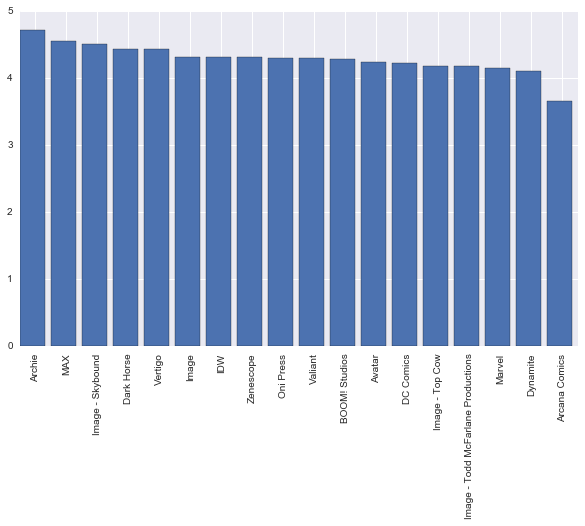

In [124]:
# E agora, o mesmo gráfico com a avaliação média das grandes editoras
y_axis = big_pub_avg_rating['mean']['Rating']
x_axis = np.arange(len(y_axis))

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.5, tuple(big_pub_avg_rating.index), rotation=90)
plt.show()

In [125]:
# Vamos ver agora se a classificação etária faz alguma diferença significativa nas avaliações
rating_by_age = pd.pivot_table(comics_more_than_5_ratings, 
                               values=['Rating'], 
                               index=['Age Rating'], 
                               aggfunc=[np.mean, np.count_nonzero])
                               
print(rating_by_age)

                mean count_nonzero
              Rating        Rating
Age Rating                        
12+ Only    4.185380       28304.0
15+ Only    4.218854        4487.0
17+ Only    4.341259        9925.0
18+ Only    4.143939         264.0
9+ Only     4.360186        1502.0
All Ages    4.395935        1230.0


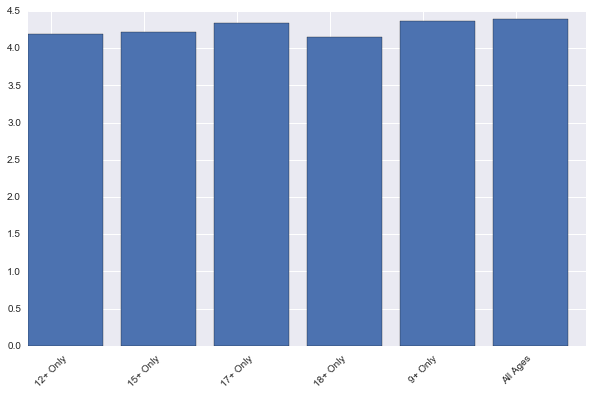

In [126]:
# Gráfico de barras com a avaliação média por faixa etária
y_axis = rating_by_age['mean']['Rating']
x_axis = np.arange(len(y_axis))

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.25, tuple(rating_by_age.index), rotation=45)
plt.show()

In [127]:
# Cria tabela com a quantidade de quadrinhos lançados por ano, baseado na data 
# de lançamento da versão impressa
print_releases_per_year = pd.pivot_table(comixology_df, 
                                         values=['Name'], 
                                         index=['Print_Release_Year'], 
                                         aggfunc=[np.count_nonzero])
print_years = []
for index, row in print_releases_per_year.iterrows():    
    print_year = int(index)
    print_years.append(print_year)
print_releases_per_year.index = print_years
print(print_releases_per_year)

     count_nonzero
              Name
1900            14
1938             1
1939             6
1940             7
1941            21
1942            22
1943            18
1944            13
1945            13
1946            15
1947             4
1948            11
1949            14
1950             7
1951             2
1952             4
1953             3
1954             6
1955             9
1956             8
1957             9
1958             6
1959            13
1960            17
1961            29
1962            45
1963            74
1964            71
1965            58
1966            63
...            ...
1987           243
1988           281
1989           248
1990           302
1991           353
1992           402
1993           537
1994           630
1995           599
1996           499
1997           605
1998           664
1999           727
2000           771
2001           676
2002           714
2003           876
2004          1151
2005          1365
2006        

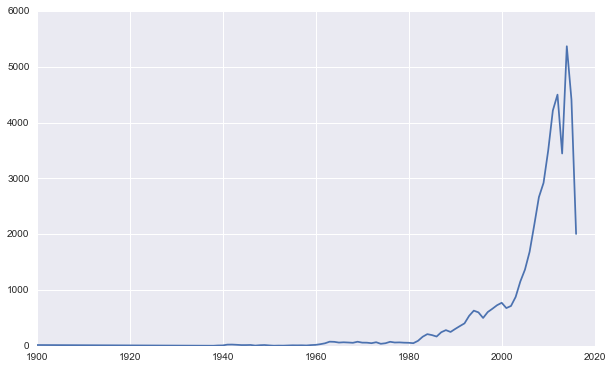

In [128]:
y_axis = print_releases_per_year['count_nonzero']['Name']
x_axis = print_releases_per_year['count_nonzero']['Name'].index
plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_axis)
plt.show()

In [129]:
# Vejamos agora as 30 comics com mais avaliações; se for mantida a proporção, pode-se
# dizer que estas são as comics mais baixadas (e não vendidas, pois algumas destas são gratuitas)
comics_by_ratings_quantity = comixology_df[['Name','Publisher','Ratings_Quantity']].sort_values(by='Ratings_Quantity', ascending=False)
print(comics_by_ratings_quantity.head(30))

                                          Name         Publisher  \
55253                      The Walking Dead #1  Image - Skybound   
41479    Arrow (2012-2013) #1: Special Edition         DC Comics   
53325                                  Saga #1             Image   
11898                                 Bane 101         DC Comics   
16638       Injustice: Gods Among Us (2013) #1         DC Comics   
12709                        Batman (2011-) #1         DC Comics   
17286                Justice League (2011-) #1         DC Comics   
55228   The Walking Dead Vol. 1: Days Gone Bye  Image - Skybound   
19435     Batman: Night of the Owls Booklet #1         DC Comics   
549    Batman Black & White: A Black and Wh...         DC Comics   
231                                 Batman 101         DC Comics   
2246                         Blackest Night #0         DC Comics   
61309       Amazing Spider-Man (1999-2013) #36            Marvel   
49490          Teenage Mutant Ninja Turtles #1  

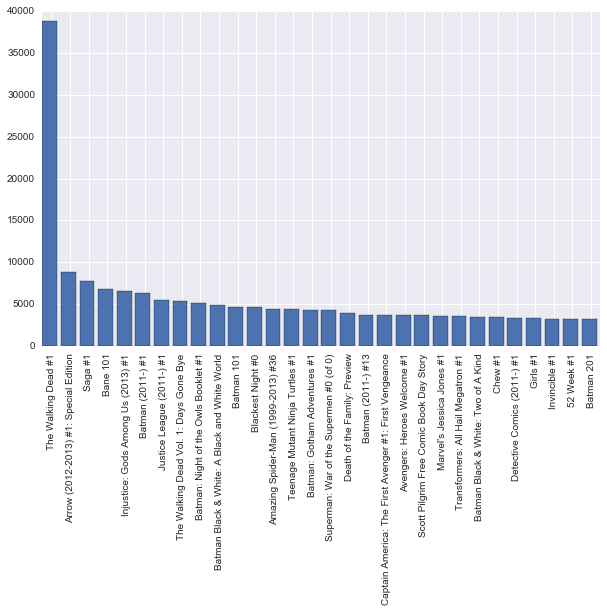

In [130]:
y_axis = comics_by_ratings_quantity.head(30)['Ratings_Quantity']
x_axis = np.arange(len(y_axis))

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.5, tuple(comics_by_ratings_quantity.head(30)['Name']), rotation=90)
plt.show()

In [131]:
# Vamos agora ver dados somente das duas maiores: Marvel e DC
marvel_dc_comics = comixology_df[(comixology_df.Publisher == 'Marvel') | 
                                 (comixology_df.Publisher == 'DC Comics')]
 
# Primeiro, alguns valores médios de cada uma                                
marvel_dc_pivot_averages = pd.pivot_table(marvel_dc_comics, 
                               values=['Rating','Original_price','Page Count','Price_per_page'], 
                               index=['Publisher'], 
                               aggfunc=[np.mean])
print(marvel_dc_pivot_averages)

                    mean                                    
          Original_price Page Count Price_per_page    Rating
Publisher                                                   
DC Comics       2.600034  35.318463       0.078356  4.233034
Marvel          3.398555  41.344295       0.090946  4.191335


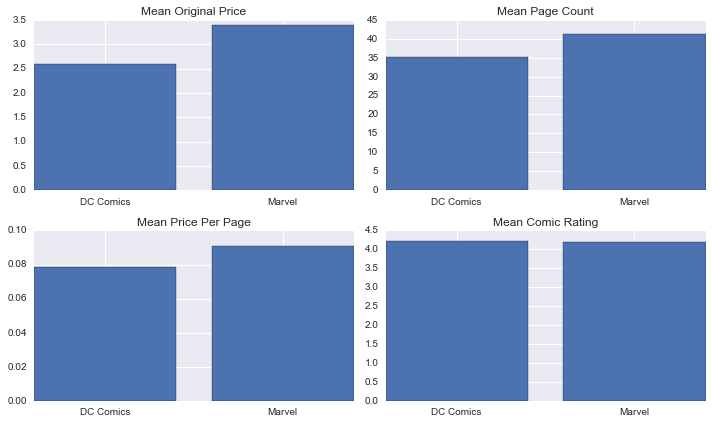

In [132]:
plt.figure(1,figsize=(10, 6))

plt.subplot(221) # Mean original price
y_axis = marvel_dc_pivot_averages['mean']['Original_price']
x_axis = np.arange(len(marvel_dc_pivot_averages['mean']['Original_price']))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, tuple(marvel_dc_pivot_averages['mean']['Original_price'].index))
plt.title('Mean Original Price')
plt.tight_layout()

plt.subplot(222) # Mean page count
y_axis = marvel_dc_pivot_averages['mean']['Page Count']
x_axis = np.arange(len(marvel_dc_pivot_averages['mean']['Page Count']))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, tuple(marvel_dc_pivot_averages['mean']['Page Count'].index))
plt.title('Mean Page Count')
plt.tight_layout()

plt.subplot(223) # Mean Price Per Page
y_axis = marvel_dc_pivot_averages['mean']['Price_per_page']
x_axis = np.arange(len(marvel_dc_pivot_averages['mean']['Price_per_page']))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, tuple(marvel_dc_pivot_averages['mean']['Price_per_page'].index))
plt.title('Mean Price Per Page')
plt.tight_layout()

plt.subplot(224) # Mean Comic Rating
y_axis = marvel_dc_pivot_averages['mean']['Rating']
x_axis = np.arange(len(marvel_dc_pivot_averages['mean']['Rating']))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, tuple(marvel_dc_pivot_averages['mean']['Rating'].index))
plt.title('Mean Comic Rating')
plt.tight_layout()

plt.show()

In [133]:
# Vamos agora verificar a quantidade de comics de cada uma e fazer uma proporção
# com a quantidade de comics de cada uma com rating maior ou igual a 4. Desta 
# forma podemos ver qual delas, proporcionalmente, lança bons comics
marvel_total = len(marvel_dc_comics[marvel_dc_comics['Publisher'] == 'Marvel'])
marvel_4_or_5 = len(marvel_dc_comics[(marvel_dc_comics['Publisher'] == 'Marvel') &
                                     (marvel_dc_comics['Rating'] >= 4)])
marvel_proportion_4_or_5 = marvel_4_or_5 / marvel_total
marvel_1_or_2 = len(marvel_dc_comics[(marvel_dc_comics['Publisher'] == 'Marvel') &
                                     (marvel_dc_comics['Rating'] <= 2)])
marvel_proportion_1_or_2 = marvel_1_or_2 / marvel_total

dc_total = len(marvel_dc_comics[marvel_dc_comics['Publisher'] == 'DC Comics'])
dc_4_or_5 = len(marvel_dc_comics[(marvel_dc_comics['Publisher'] == 'DC Comics') &
                                     (marvel_dc_comics['Rating'] >= 4)])
dc_proportion_4_or_5 = dc_4_or_5 / dc_total
dc_1_or_2 = len(marvel_dc_comics[(marvel_dc_comics['Publisher'] == 'DC Comics') &
                                     (marvel_dc_comics['Rating'] <= 2)])
dc_proportion_1_or_2 = dc_1_or_2 / dc_total

print("\n")
print("Total de Comics Marvel: " + str(marvel_total))
print("Total de Comics Marvel com avaliação maior ou igual a 4: " + str(marvel_4_or_5))
print("Proporção de Comics Marvel com avaliação maior ou igual a 4: " + str("{0:.2f}%".format(marvel_proportion_4_or_5 * 100)))
print("Total de Comics Marvel com avaliação menor ou igual a 2: " + str(marvel_1_or_2))
print("Proporção de Comics Marvel com avaliação menor ou igual a 2: " + str("{0:.2f}%".format(marvel_proportion_1_or_2 * 100)))
print("\n")
print("Total de Comics DC Comics: " + str(dc_total))
print("Total de Comics DC Comics com avaliação maior ou igual a 4: " + str(dc_4_or_5))
print("Proporção de Comics DC Comics com avaliação maior ou igual a 4: " + str("{0:.2f}%".format(dc_proportion_4_or_5 * 100)))
print("Total de Comics DC Comics com avaliação menor ou igual a 2: " + str(dc_1_or_2))
print("Proporção de Comics DC Comics com avaliação menor ou igual a 2: " + str("{0:.2f}%".format(dc_proportion_1_or_2 * 100)))
print("\n")



Total de Comics Marvel: 18063
Total de Comics Marvel com avaliação maior ou igual a 4: 14791
Proporção de Comics Marvel com avaliação maior ou igual a 4: 81.89%
Total de Comics Marvel com avaliação menor ou igual a 2: 95
Proporção de Comics Marvel com avaliação menor ou igual a 2: 0.53%


Total de Comics DC Comics: 17440
Total de Comics DC Comics com avaliação maior ou igual a 4: 15986
Proporção de Comics DC Comics com avaliação maior ou igual a 4: 91.66%
Total de Comics DC Comics com avaliação menor ou igual a 2: 62
Proporção de Comics DC Comics com avaliação menor ou igual a 2: 0.36%




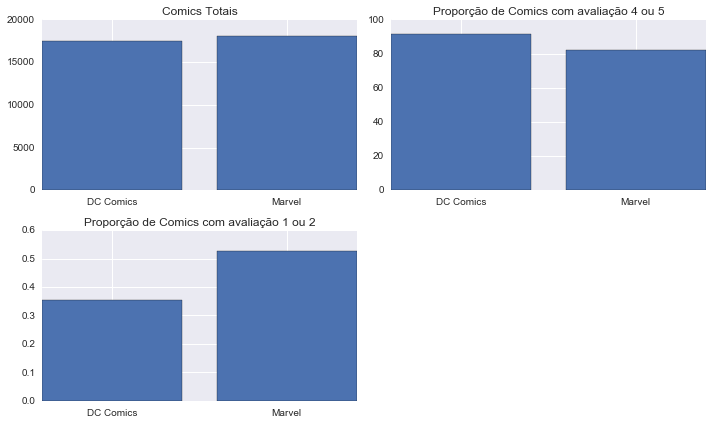

In [134]:
plt.figure(2,figsize=(10, 6))

plt.subplot(221) # Total de Comics de cada editora
y_axis = [dc_total, marvel_total]
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, ('DC Comics','Marvel'))
plt.title('Comics Totais')
plt.tight_layout()

plt.subplot(222) # Proporção de Comics com avaliação 4 ou 5
y_axis = [dc_proportion_4_or_5 * 100, marvel_proportion_4_or_5 * 100]
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, ('DC Comics','Marvel'))
plt.title('Proporção de Comics com avaliação 4 ou 5')
plt.tight_layout()

plt.subplot(223) # Proporção de Comics com avaliação 1 ou 2
y_axis = [dc_proportion_1_or_2 * 100, marvel_proportion_1_or_2 * 100]
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, ('DC Comics','Marvel'))
plt.title('Proporção de Comics com avaliação 1 ou 2')
plt.tight_layout()

plt.show()

In [135]:
# Somar a quantidade de avaliações em comics de cada editora
marvel_dc_pivot_sums = pd.pivot_table(marvel_dc_comics, 
                               values=['Ratings_Quantity'], 
                               index=['Publisher'], 
                               aggfunc=[np.sum])
print(marvel_dc_pivot_sums)

                       sum
          Ratings_Quantity
Publisher                 
DC Comics          1725344
Marvel             1099324


In [136]:
# Definir lista de times e personagens da DC e Marvel
main_dc_characters = ['Superman','Batman','Aquaman','Wonder Woman', 'Flash', 'Robin',
                   'Arrow', 'Batgirl', 'Bane', 'Harley Queen', 'Poison Ivy', 'Joker',
                   'Firestorm','Vixen','Martian Manhunter','Zod','Penguin','Lex Luthor',
                   'Green Lantern','Supergirl','Atom','Cyborg','Hawkgirl','Starfire',
                   'Jonah Hex','Booster Gold','Black Canary','Shazam','Catwoman',
                   'Nightwing','Zatanna','Hawkman','Power Girl','Rorschach','Doctor Manhattan',
                   'Blue Beetle','Batwoman','Darkseid','Vandal Savage', "Ra's Al Ghul",
                   'Riddler','Reverse Flash','Black Adam','Deathstroke','Brainiac',
                   'Sinestro','Two-Face',]
main_marvel_characters = ['Spider-Man','Captain Marvel','Hulk','Thor','Iron Man','Luke Cage',
                          'Black Widow','Daredevil','Captain America','Jessica Jones',
                          'Ghost Rider','Spider-Woman','Silver Surfer','Beast','Thing',
                          'Kitty Pride','Doctor Strange','Black Panther','Invisible Woman',
                          'Nick Fury','Storm','Professor X','Cyclops','Jean Grey','Wolverine',
                          'Scarlet Witch','Gambit','Rogue','X-23','Iceman','She-Hulk',
                          'Iron Fist','Hawkeye','Quicksilver','Vision','Ant-Man','Cable',
                          'Bishop','Colossus','Deadpool','Human Torch','Mr. Fantastic',
                          'Nightcrawler','Nova','Psylocke','Punisher','Rocket Raccoon',
                          'Groot','Star-Lord','War Machine','Gamora','Drax','Venom',
                          'Carnage','Octopus','Green Goblin','Abomination','Enchantress',
                          'Sentinel','Viper','Lady Deathstrike','Annihilus','Ultron',
                          'Galactus','Kang','Bullseye','Juggernaut','Sabretooth','Mystique',
                          'Kingpin','Apocalypse','Thanos','Dark Phoenix','Loki','Red Skull',
                          'Magneto','Doctor Doom','Ronan']
                          
dc_teams = ['Justice League','Teen Titans','Justice Society','Lantern Corps',
            'Legion of Super-Heroes','All-Star Squadron','Suicide Squad','Birds of Prey',
            'Gen13', 'The League of Extraordinary Gentlemen','Watchmen']
            
marvel_teams = ['X-Men','Avengers','Fantastic Four','Asgardian Gods','Skrulls',
                'S.H.I.E.L.D.','Inhumans','A.I.M.','X-Factor','X-Force','Defenders',
                'New Mutants','Brotherhood of Evil Mutants','Thunderbolts', 'Alpha Flight',
                'Guardians of the Galaxy','Nova Corps','Illuminati']

In [137]:
character_row = {}
characters_dicts = []

for character in main_dc_characters:
    character_df = comixology_df[(comixology_df['Name'].str.contains(character)) & 
                                 (comixology_df['Publisher'] == 'DC Comics')]
    character_row['Character_Name'] = character
    character_row['Quantity_of_comics'] = len(character_df)
    character_row['Average_Rating'] = np.nanmean(character_df['Rating'])
    character_row['Average_Price'] = np.nanmean(character_df['Original_price'])
    character_row['Average_Pages'] = np.nanmean(character_df['Page Count'])
    characters_dicts.append(character_row)
    character_row = {}
    
for character in main_marvel_characters:
    character_df = comixology_df[(comixology_df['Name'].str.contains(character)) & 
                                 (comixology_df['Publisher'] == 'Marvel')]
    character_row['Character_Name'] = character
    character_row['Quantity_of_comics'] = len(character_df)
    character_row['Average_Rating'] = np.nanmean(character_df['Rating'])
    character_row['Average_Price'] = np.nanmean(character_df['Original_price'])
    character_row['Average_Pages'] = np.nanmean(character_df['Page Count'])
    characters_dicts.append(character_row)
    character_row = {}
    
characters_df = pd.DataFrame(characters_dicts)

In [138]:
team_row = {}
teams_dicts = []

for team in dc_teams:
    team_df = comixology_df[(comixology_df['Name'].str.contains(team)) & 
                                 (comixology_df['Publisher'] == 'DC Comics')]
    team_row['Team_Name'] = team
    team_row['Quantity_of_comics'] = len(team_df)
    team_row['Average_Rating'] = np.nanmean(team_df['Rating'])
    team_row['Average_Price'] = np.nanmean(team_df['Original_price'])
    team_row['Average_Pages'] = np.nanmean(team_df['Page Count'])
    teams_dicts.append(team_row)
    team_row = {}
    
for team in marvel_teams:
    team_df = comixology_df[(comixology_df['Name'].str.contains(team)) & 
                                 (comixology_df['Publisher'] == 'Marvel')]
    team_row['Team_Name'] = team
    team_row['Quantity_of_comics'] = len(team_df)
    team_row['Average_Rating'] = np.nanmean(team_df['Rating'])
    team_row['Average_Price'] = np.nanmean(team_df['Original_price'])
    team_row['Average_Pages'] = np.nanmean(team_df['Page Count'])
    teams_dicts.append(team_row)
    team_row = {}
    
teams_df = pd.DataFrame(teams_dicts)

In [139]:
teams_df = teams_df[teams_df['Quantity_of_comics'] > 10]
characters_df = characters_df[characters_df['Quantity_of_comics'] > 10]

In [140]:
# Limitando a 20 o número de personagens
top_characters_by_quantity = characters_df.sort_values(by='Quantity_of_comics',ascending=False)[['Character_Name','Average_Rating','Quantity_of_comics']].head(20)
top_characters_by_rating = characters_df.sort_values(by='Average_Rating',ascending=False)[['Character_Name','Average_Rating','Quantity_of_comics']].head(20)

top_teams_by_quantity = teams_df.sort_values(by='Quantity_of_comics', ascending=False)[['Team_Name','Average_Rating','Quantity_of_comics']]
top_teams_by_rating = teams_df.sort_values(by='Average_Rating', ascending=False)[['Team_Name','Average_Rating','Quantity_of_comics']]

print(top_characters_by_quantity)

     Character_Name  Average_Rating  Quantity_of_comics
1            Batman        4.218568                2459
47       Spider-Man        4.335099                1680
0          Superman        4.197286                1043
55  Captain America        3.949602                 831
51         Iron Man        4.083821                 744
49             Hulk        4.098540                 707
18    Green Lantern        4.132159                 694
71        Wolverine        4.122517                 631
4             Flash        4.206271                 616
3      Wonder Woman        4.313629                 615
50             Thor        4.251244                 597
54        Daredevil        4.306867                 529
86         Deadpool        4.319018                 504
5             Robin        4.308235                 429
6             Arrow        4.223214                 341
19        Supergirl        4.205036                 296
28         Catwoman        3.920635             

In [141]:
print(top_characters_by_rating)

        Character_Name  Average_Rating  Quantity_of_comics
115           Mystique        4.666667                  27
25        Booster Gold        4.633803                  83
24           Jonah Hex        4.632911                  84
14   Martian Manhunter        4.611111                  55
35         Blue Beetle        4.542373                  59
94               Groot        4.500000                  13
59       Silver Surfer        4.468750                  82
23            Starfire        4.428571                  14
64       Black Panther        4.418033                 150
52           Luke Cage        4.388889                  29
37            Darkseid        4.363636                  11
83               Cable        4.361111                 144
81              Vision        4.352941                  56
92            Punisher        4.351852                 164
78           Iron Fist        4.348624                 114
96         War Machine        4.347826                  

In [142]:
print(top_teams_by_quantity)

                  Team_Name  Average_Rating  Quantity_of_comics
11                    X-Men        4.117677                2025
12                 Avengers        4.063710                1721
0            Justice League        4.190608                 744
13           Fantastic Four        4.469671                 632
1               Teen Titans        4.341518                 457
4    Legion of Super-Heroes        4.268966                 326
19                 X-Factor        4.253521                 224
7             Birds of Prey        4.167513                 198
20                  X-Force        4.240838                 193
6             Suicide Squad        4.006329                 159
26  Guardians of the Galaxy        4.132812                 143
3             Lantern Corps        4.125926                 136
22              New Mutants        4.095238                 130
24             Thunderbolts        4.431193                 127
16             S.H.I.E.L.D.        4.053

In [143]:
print(top_teams_by_rating)

                  Team_Name  Average_Rating  Quantity_of_comics
5         All-Star Squadron        4.500000                  50
13           Fantastic Four        4.469671                 632
24             Thunderbolts        4.431193                 127
25             Alpha Flight        4.384615                  14
10                 Watchmen        4.345455                  55
1               Teen Titans        4.341518                 457
4    Legion of Super-Heroes        4.268966                 326
19                 X-Factor        4.253521                 224
17                 Inhumans        4.245902                  69
20                  X-Force        4.240838                 193
0            Justice League        4.190608                 744
8                     Gen13        4.175000                  40
7             Birds of Prey        4.167513                 198
2           Justice Society        4.142857                  77
26  Guardians of the Galaxy        4.132

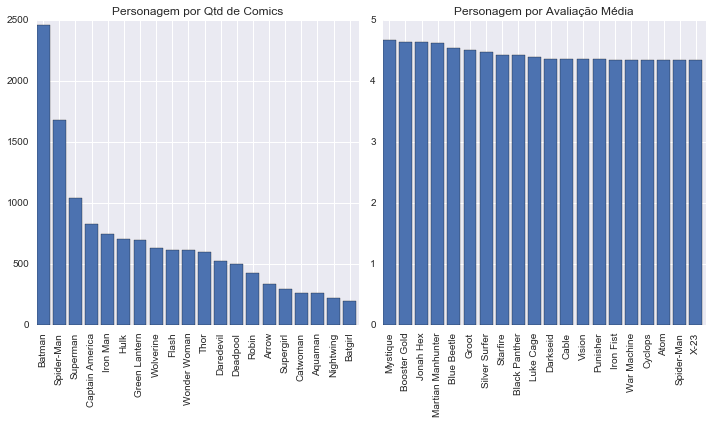

In [144]:
plt.figure(3,figsize=(10, 6))

plt.subplot(121) # Personagem por quantidade de comics
y_axis = top_characters_by_quantity['Quantity_of_comics']
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, tuple(top_characters_by_quantity['Character_Name']), rotation=90)
plt.title('Personagem por Qtd de Comics')
plt.tight_layout()

plt.subplot(122) # Personagem por avaliação média
y_axis = top_characters_by_rating['Average_Rating']
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, tuple(top_characters_by_rating['Character_Name']), rotation=90)
plt.title('Personagem por Avaliação Média')
plt.tight_layout()

plt.show()

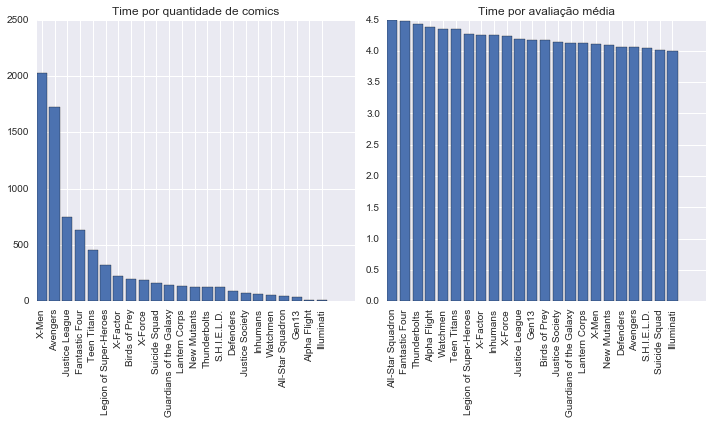

In [145]:
plt.figure(4,figsize=(10, 6))

plt.subplot(121) # Time por quantidade de comics
y_axis = top_teams_by_quantity['Quantity_of_comics']
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, tuple(top_teams_by_quantity['Team_Name']), rotation=90)
plt.title('Time por quantidade de comics')
plt.tight_layout()

plt.subplot(122) # Time por avaliação média
y_axis = top_teams_by_rating['Average_Rating']
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis+0.4, tuple(top_teams_by_rating['Team_Name']), rotation=90)
plt.title('Time por avaliação média')
plt.tight_layout()

plt.show()